### Import Library

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import joblib

In [69]:
data = pd.read_csv("PhisingDetection.csv")

In [70]:
data.head()

,Unnamed: 0,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
0,0,3,72,0,0,0,0,5,44,0,1.0
1,1,3,144,0,0,0,0,3,16,41,1.0
2,2,3,58,0,0,0,0,2,24,0,1.0
3,3,3,79,1,0,0,0,6,50,0,1.0
4,4,3,46,0,0,0,0,4,29,2,1.0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662591 entries, 0 to 662590
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       662591 non-null  int64  
 1   NumDots          662591 non-null  int64  
 2   UrlLength        662591 non-null  int64  
 3   NumDash          662591 non-null  int64  
 4   AtSymbol         662591 non-null  int64  
 5   IpAddress        662591 non-null  int64  
 6   HttpsInHostname  662591 non-null  int64  
 7   PathLevel        662591 non-null  int64  
 8   PathLength       662591 non-null  int64  
 9   NumNumericChars  662591 non-null  int64  
 10  Phising          630071 non-null  float64
dtypes: float64(1), int64(10)
memory usage: 55.6 MB


In [72]:
data.isnull().sum()

Unnamed: 0             0
NumDots                0
UrlLength              0
NumDash                0
AtSymbol               0
IpAddress              0
HttpsInHostname        0
PathLevel              0
PathLength             0
NumNumericChars        0
Phising            32520
dtype: int64

In [73]:
phising_null = data[data['Phising'].isnull()]
phising_null

,Unnamed: 0,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
11438,11438,3,67,0,0,0,0,3,27,1,NaN
11515,11515,1,81,0,0,0,0,1,65,1,NaN
11556,11556,1,63,0,0,0,0,1,47,1,NaN
11612,11612,1,99,0,0,0,0,1,83,1,NaN
11640,11640,2,81,1,0,0,0,1,18,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
566581,566581,4,34,0,0,0,0,1,7,1,NaN
566582,566582,4,34,0,0,0,0,1,7,1,NaN
566583,566583,4,35,0,0,0,0,1,7,1,NaN
566584,566584,4,32,0,0,0,0,1,7,1,NaN


In [74]:
data['Phising'] = data['Phising'].fillna(0)

In [75]:
data

,Unnamed: 0,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
0,0,3,72,0,0,0,0,5,44,0,1.0
1,1,3,144,0,0,0,0,3,16,41,1.0
2,2,3,58,0,0,0,0,2,24,0,1.0
3,3,3,79,1,0,0,0,6,50,0,1.0
4,4,3,46,0,0,0,0,4,29,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...
662586,662586,3,39,0,0,0,0,4,39,1,1.0
662587,662587,2,44,2,0,0,0,4,44,1,1.0
662588,662588,2,42,0,0,0,0,4,42,1,1.0
662589,662589,2,45,0,0,0,0,3,45,0,1.0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662591 entries, 0 to 662590
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       662591 non-null  int64  
 1   NumDots          662591 non-null  int64  
 2   UrlLength        662591 non-null  int64  
 3   NumDash          662591 non-null  int64  
 4   AtSymbol         662591 non-null  int64  
 5   IpAddress        662591 non-null  int64  
 6   HttpsInHostname  662591 non-null  int64  
 7   PathLevel        662591 non-null  int64  
 8   PathLength       662591 non-null  int64  
 9   NumNumericChars  662591 non-null  int64  
 10  Phising          662591 non-null  float64
dtypes: float64(1), int64(10)
memory usage: 55.6 MB


In [77]:
data = data.drop(data.columns[0], axis=1)

In [78]:
data['Phising'] = data['Phising'].round().astype(int)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662591 entries, 0 to 662590
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   NumDots          662591 non-null  int64
 1   UrlLength        662591 non-null  int64
 2   NumDash          662591 non-null  int64
 3   AtSymbol         662591 non-null  int64
 4   IpAddress        662591 non-null  int64
 5   HttpsInHostname  662591 non-null  int64
 6   PathLevel        662591 non-null  int64
 7   PathLength       662591 non-null  int64
 8   NumNumericChars  662591 non-null  int64
 9   Phising          662591 non-null  int32
dtypes: int32(1), int64(9)
memory usage: 48.0 MB


In [80]:
data.head()

,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
0,3,72,0,0,0,0,5,44,0,1
1,3,144,0,0,0,0,3,16,41,1
2,3,58,0,0,0,0,2,24,0,1
3,3,79,1,0,0,0,6,50,0,1
4,3,46,0,0,0,0,4,29,2,1


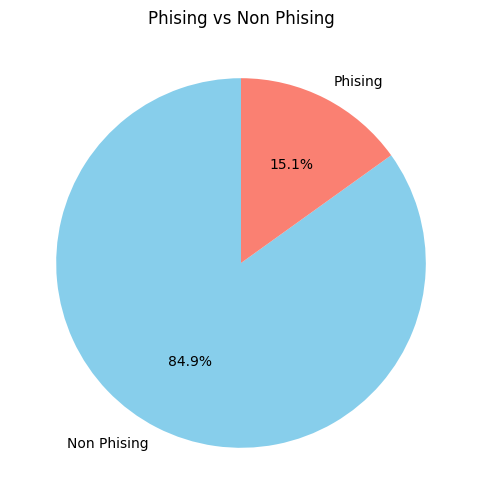

In [81]:
phising_counts = data['Phising'].value_counts()
labels = ['Non Phising', 'Phising']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6, 6))
plt.pie(phising_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Phising vs Non Phising')
plt.show()

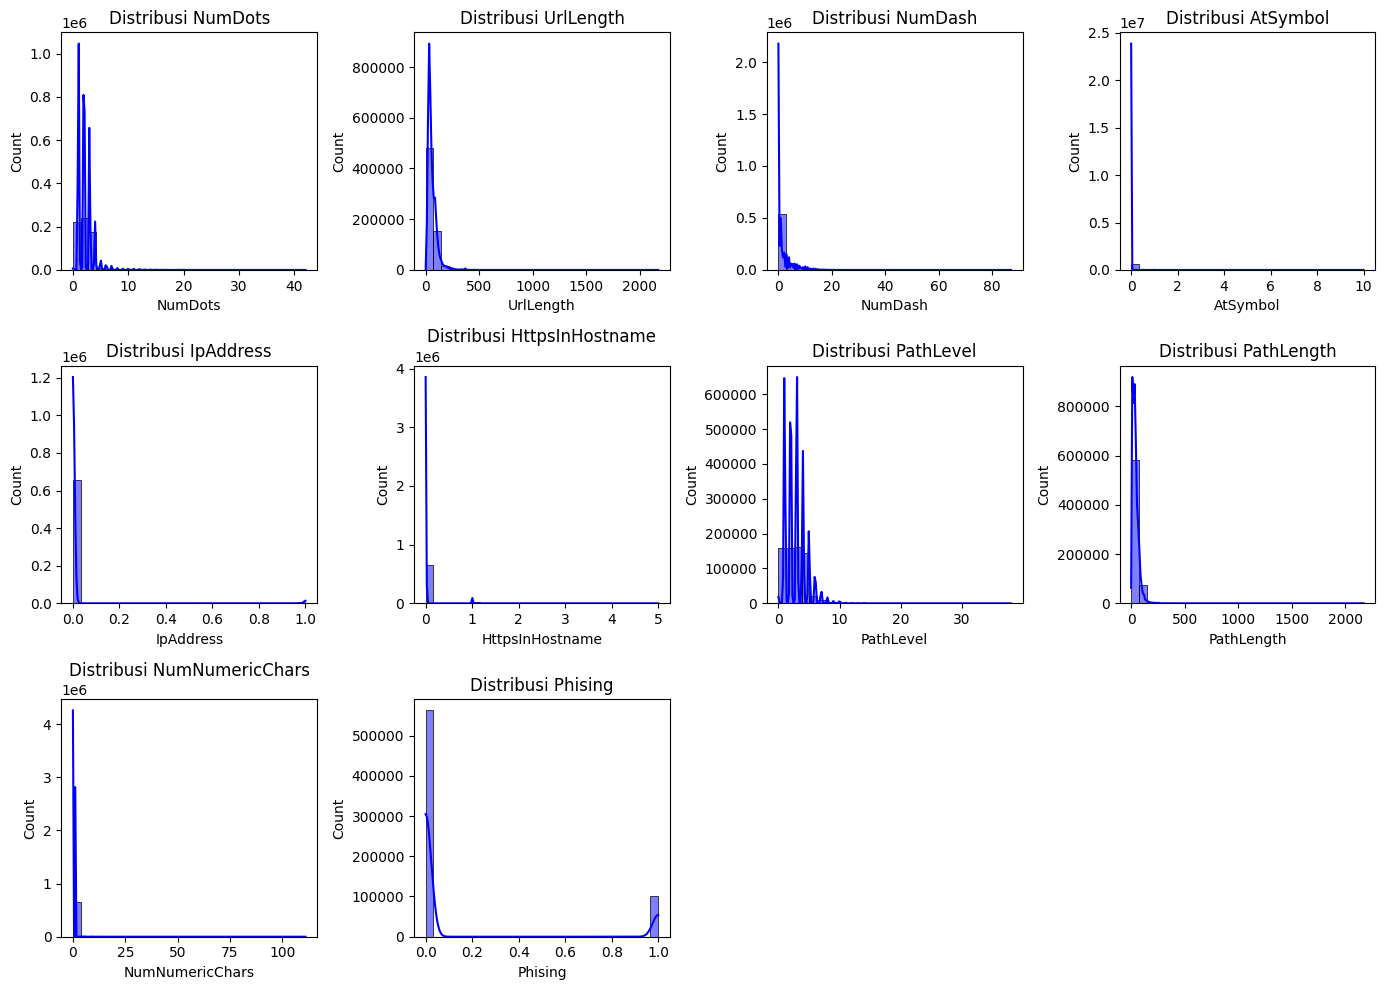

In [82]:
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30 , kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

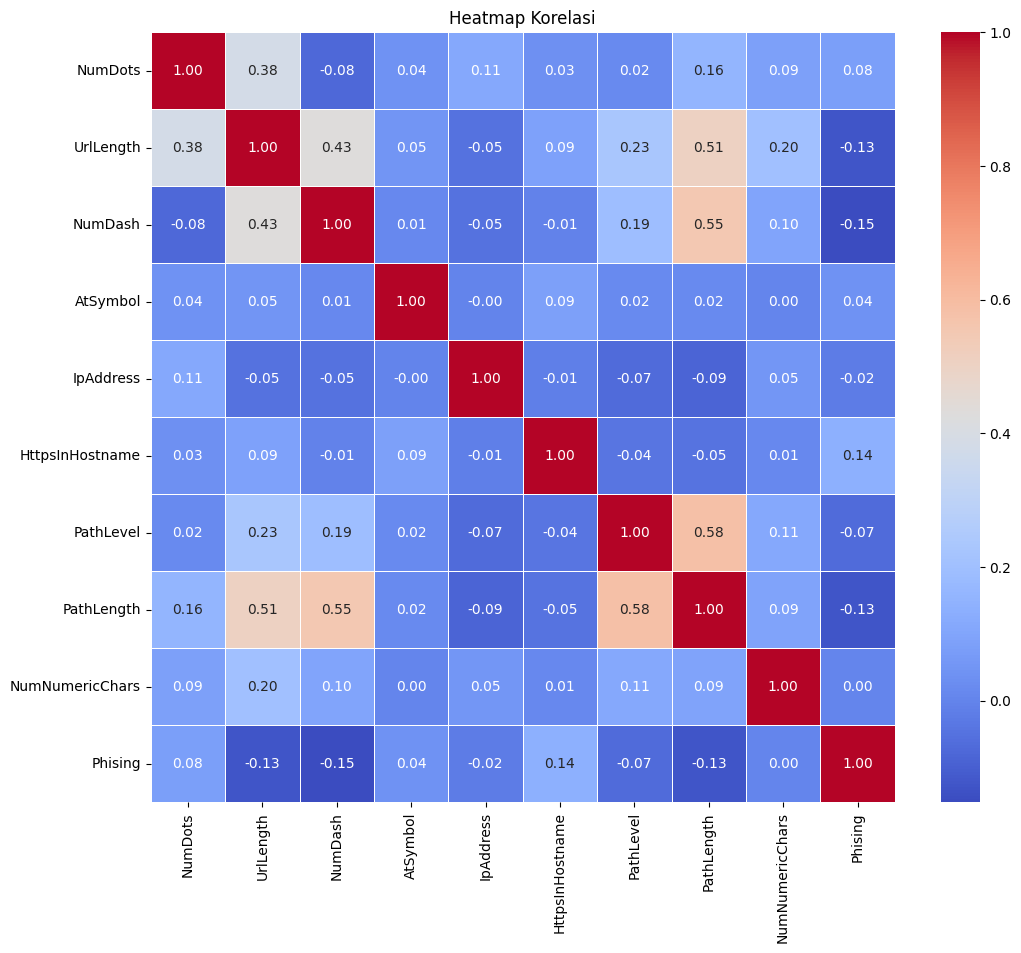

In [83]:
plt.figure(figsize=(12,10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

<Figure size 1500x800 with 0 Axes>

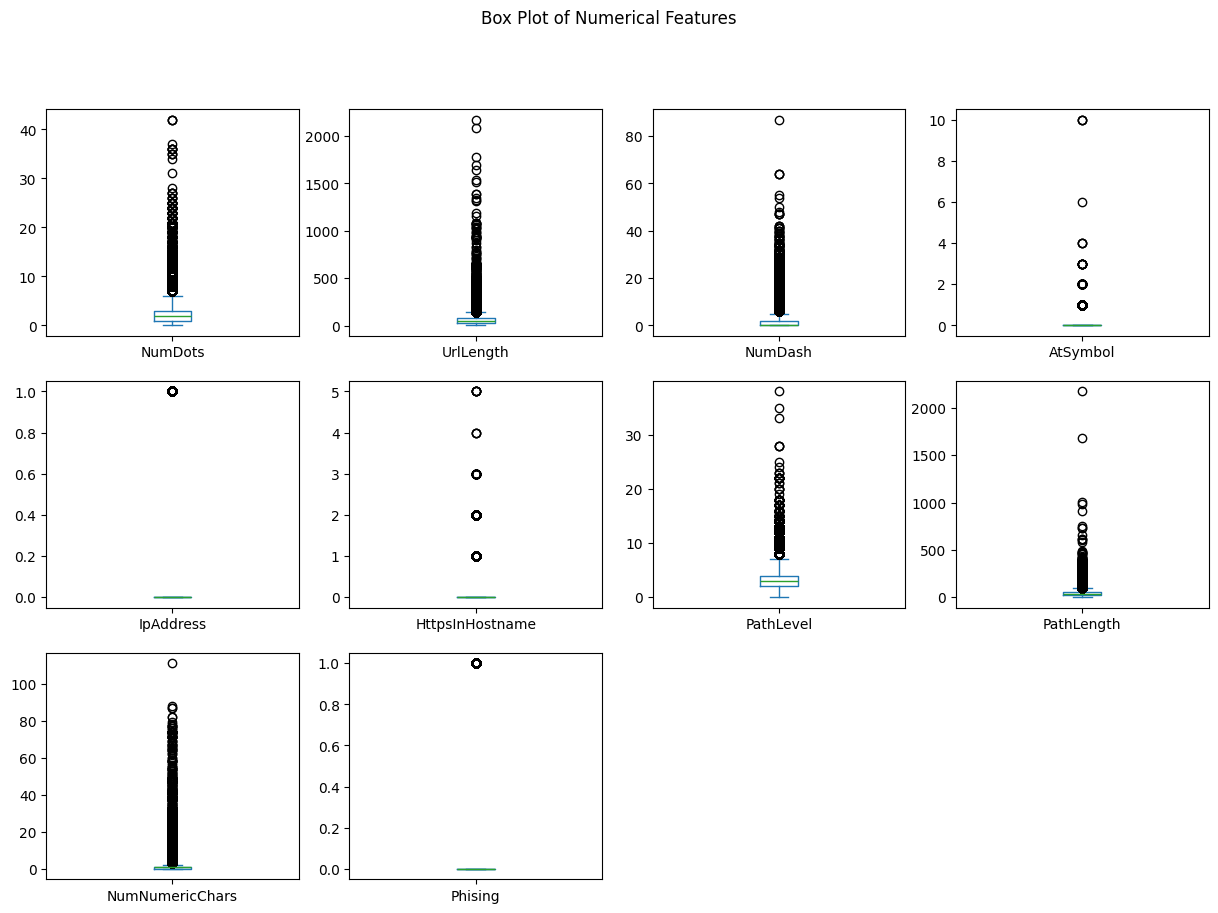

In [84]:
plt.figure(figsize=(15, 8))
num_features.plot(kind='box', subplots=True, layout=(3, 4), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle("Box Plot of Numerical Features")
plt.show()

In [85]:
%pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
X = data.drop(columns=['Phising'])
y = data['Phising']

In [88]:
X.head()

,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars
0,3,72,0,0,0,0,5,44,0
1,3,144,0,0,0,0,3,16,41
2,3,58,0,0,0,0,2,24,0
3,3,79,1,0,0,0,6,50,0
4,3,46,0,0,0,0,4,29,2


In [89]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Phising, dtype: int32

In [90]:
X = data.drop('Phising', axis=1)
y = data['Phising']

scaler = StandardScaler()
X_scaled_df = scaler.fit_transform(X)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)

In [91]:
print(pd.Series(y_resampled).value_counts())

Phising
1    562580
0    562580
Name: count, dtype: int64


Class Distribution After Resampling:
Phising
1    562580
0    562580
Name: count, dtype: int64


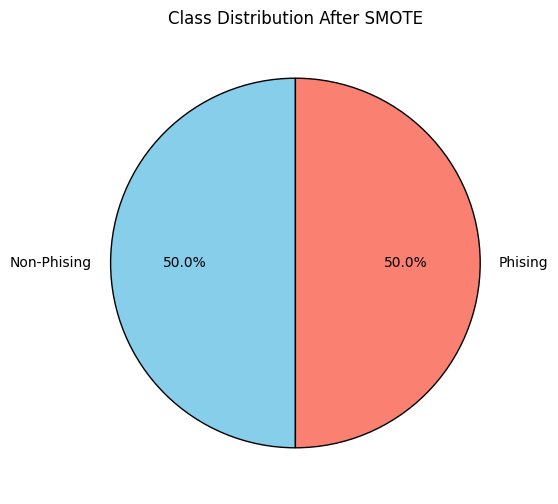

In [92]:
print("Class Distribution After Resampling:")
print(pd.Series(y_resampled).value_counts())

plt.figure(figsize=(6, 6))
class_counts = pd.Series(y_resampled).value_counts()
class_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['Non-Phising', 'Phising'],
    colors=['skyblue', 'salmon'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Class Distribution After SMOTE')
plt.ylabel('')
plt.show()

In [94]:
import joblib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Simpan scaler setelah fit
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [95]:
model = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully


In [96]:
import joblib

joblib.dump(model, 'model_logistic_regression.pkl')
print("Model trained successfully")

Model trained successfully


In [97]:
loaded_model = joblib.load('model_logistic_regression.pkl')

y_pred_loaded = loaded_model.predict(X_test)
y_pred_proba_loaded = loaded_model.predict_proba(X_test)[:,1]

In [98]:
precision_loaded = precision_score(y_test, y_pred_loaded)
recall_loaded = recall_score(y_test, y_pred_loaded)
f1_loaded = f1_score(y_test, y_pred_loaded)
roc_loaded = roc_auc_score(y_test,y_pred_loaded)

In [99]:
print("Evaluation Metrics for Loaded Model: ")
print(f"Precision : {precision_loaded:.4f}")
print(f"Recall : {recall_loaded:.4f}")
print(f"F1 Score : {f1_loaded:.4f}")
print(f"AUC ROC : {roc_loaded:.4f}")

Evaluation Metrics for Loaded Model: 
Precision : 0.6584
Recall : 0.7961
F1 Score : 0.7207
AUC ROC : 0.6910


In [100]:
print(classification_report(y_test, y_pred_loaded))

              precision    recall  f1-score   support

           0       0.74      0.59      0.65    112369
           1       0.66      0.80      0.72    112663

    accuracy                           0.69    225032
   macro avg       0.70      0.69      0.69    225032
weighted avg       0.70      0.69      0.69    225032



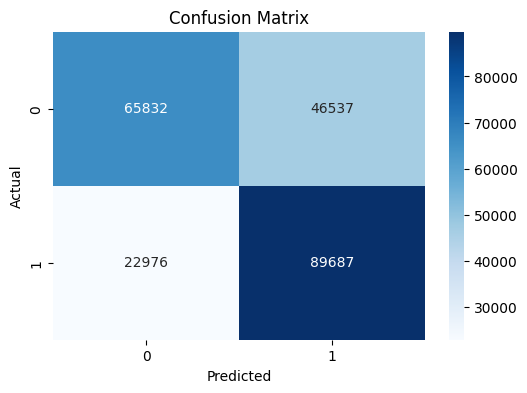

In [101]:
conf_matrix=confusion_matrix(y_test, y_pred_loaded)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [102]:
model2 = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model2.fit(X_train, y_train)
print("Model trained successfully")


Model trained successfully


In [103]:
import joblib

joblib.dump(model2, 'model_Decision_Tree.pkl')
print("Model trained successfully")


Model trained successfully


In [104]:
loaded_model2 = joblib.load('model_Decision_Tree.pkl')

y_pred_loaded = loaded_model2.predict(X_test)
y_pred_proba_loaded = loaded_model2.predict_proba(X_test)[:,1]
precision_loaded = precision_score(y_test, y_pred_loaded)
recall_loaded = recall_score(y_test, y_pred_loaded)
f1_loaded = f1_score(y_test, y_pred_loaded)
roc_loaded = roc_auc_score(y_test,y_pred_loaded)
print("Evaluation Metrics for Loaded Model: ")
print(f"Precision : {precision_loaded:.4f}")
print(f"Recall : {recall_loaded:.4f}")
print(f"F1 Score : {f1_loaded:.4f}")
print(f"AUC ROC : {roc_loaded:.4f}")


Evaluation Metrics for Loaded Model: 
Precision : 0.8426
Recall : 0.8947
F1 Score : 0.8679
AUC ROC : 0.8636


In [105]:
print(classification_report(y_test, y_pred_loaded))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86    112369
           1       0.84      0.89      0.87    112663

    accuracy                           0.86    225032
   macro avg       0.87      0.86      0.86    225032
weighted avg       0.87      0.86      0.86    225032



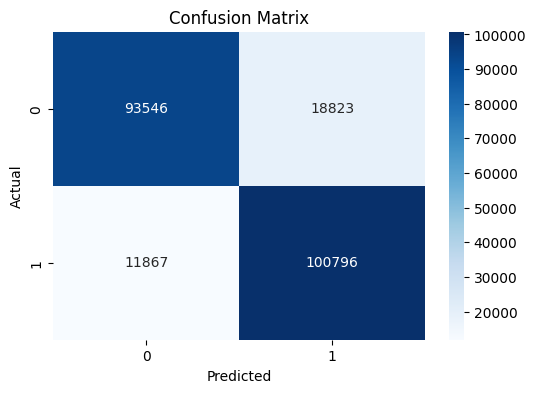

In [106]:
conf_matrix=confusion_matrix(y_test, y_pred_loaded)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Cross Validation


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Definisikan model
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()

# Cross-validation untuk Logistic Regression
log_reg_cv_score = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='f1').mean()
print("Cross-Validation F1 Score untuk Logistic Regression:", log_reg_cv_score)

# Cross-validation untuk Decision Tree
dec_tree_cv_score = cross_val_score(dec_tree, X_train_scaled, y_train, cv=5, scoring='f1').mean()
print("Cross-Validation F1 Score untuk Decision Tree:", dec_tree_cv_score)

if log_reg_cv_score > dec_tree_cv_score:
    print("Logistic Regression memiliki performa yang lebih baik berdasarkan F1 Score.")
elif dec_tree_cv_score > log_reg_cv_score:
    print("Decision Tree memiliki performa yang lebih baik berdasarkan F1 Score.")
else:
    print("Kedua model memiliki performa yang sama berdasarkan F1 Score.")


Cross-Validation F1 Score untuk Logistic Regression: 0.7207988739311153
Cross-Validation F1 Score untuk Decision Tree: 0.8657499140465204
Decision Tree memiliki performa yang lebih baik berdasarkan F1 Score.
